#**Diabetes Prediction - Using Logistic Regression, KNN, SVM, Random Forest.**

#**Phase 1: Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/DS_Notes/ALMAX_Lite/Python/Diabetes_Prediction/diabetes.csv')
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#**Phase 2: Data Preprocessing**

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
columns_zero=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[columns_zero]=data[columns_zero].replace(0,np.nan)
data.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [ ]:
# @title
for col in columns_zero:
  data[col].fillna(data[col].median(),inplace=True)
# data.isnull().sum()

<ipython-input-8-3149554240>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(),inplace=True)


In [ ]:
data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [ ]:
# data_scaled=scaler.fit_transform(data.drop('Outcome',axis=1))
# data_scaled=pd.DataFrame(data_scaled,columns=data.columns[:-1])
# # data_scaled.head()
# data_scaled['Outcome']=data['Outcome']
# data_scaled.head()


In [ ]:
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


#**Phase 3: Exploratory Data Analysis**

###**Variables/Feature Analysis**

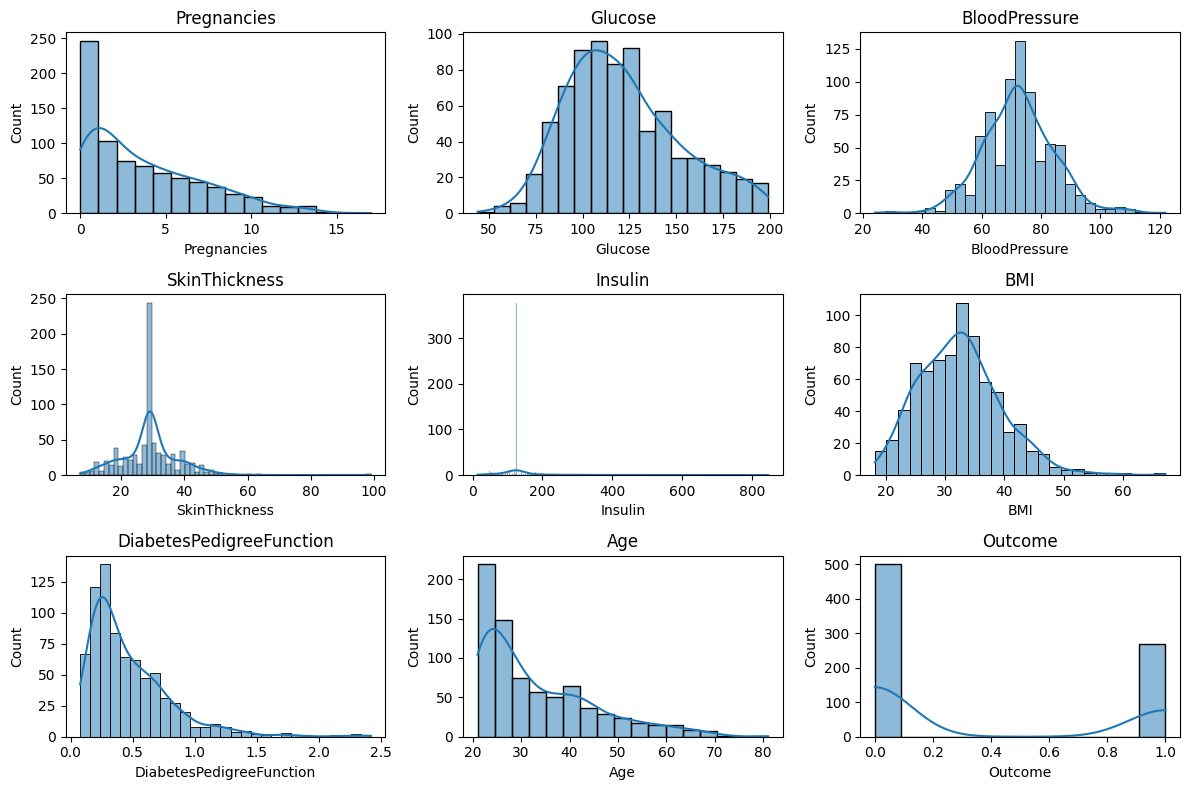

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


###**Correlation Matrix**

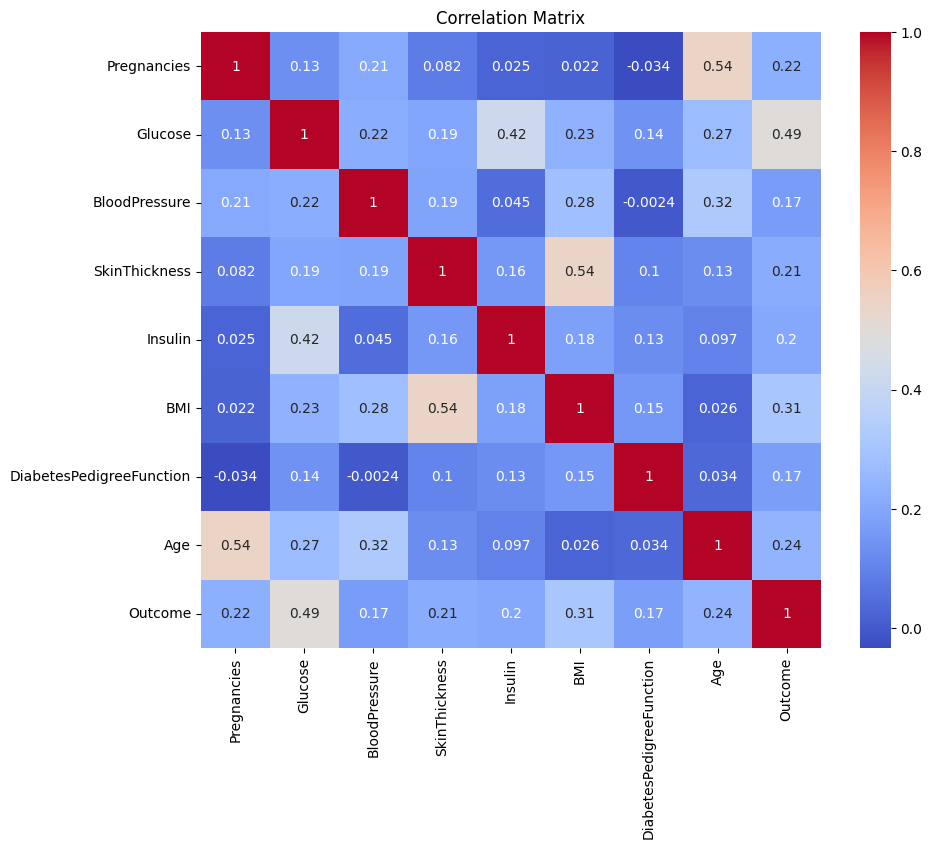

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


###**Class Distribution**

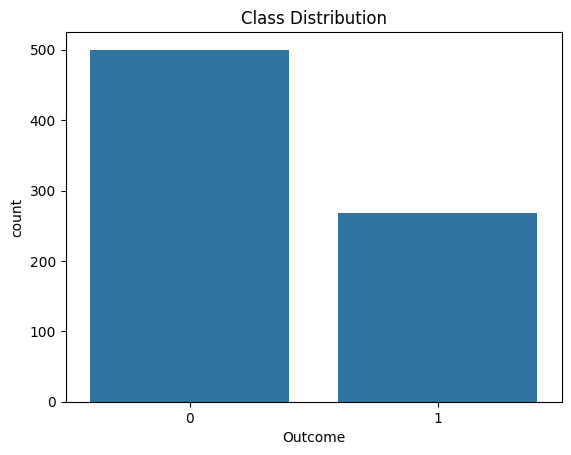

In [ ]:
sns.countplot(x='Outcome', data=data)
plt.title('Class Distribution')
plt.show()


#**Phase 4: Model Selection and Model Training**

###**Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
X= data.drop('Outcome',axis=1)
y= data['Outcome']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=42)


###**Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training data
X_test_scaled = scaler.transform(X_test)         # Use the same scaler for test data


###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logic_reg=LogisticRegression(class_weight='balanced')
logic_reg.fit(X_train_scaled,y_train)
y_pred=logic_reg.predict(X_test_scaled)
print("=================Accuracy:=================")
print(accuracy_score(y_test,y_pred))
print("=================Classification Report:=================")
print(classification_report(y_test,y_pred))
print("=================Conf Matrix:=================")
print(confusion_matrix(y_test,y_pred))

=================Accuracy:=================
0.7056277056277056
=================Classification Report:=================
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231

=================Conf Matrix:=================
[[110  41]
 [ 27  53]]


###**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)
print("=================Accuracy:=================")
print(accuracy_score(y_test,y_pred))
print("=================Classification Report:=================")
print(classification_report(y_test,y_pred))
print("=================Conf Matrix:=================")
print(confusion_matrix(y_test,y_pred))

=================Accuracy:=================
0.7056277056277056
=================Classification Report:=================
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       151
           1       0.57      0.64      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231

=================Conf Matrix:=================
[[112  39]
 [ 29  51]]


###**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred=rf.predict(X_test_scaled)
print("=================Accuracy:=================")
print(accuracy_score(y_test,y_pred))
print("=================Classification Report:=================")
print(classification_report(y_test,y_pred))
print("=================Conf Matrix:=================")
print(confusion_matrix(y_test,y_pred))


=================Accuracy:=================
0.7532467532467533
=================Classification Report:=================
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       151
           1       0.64      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231

=================Conf Matrix:=================
[[120  31]
 [ 26  54]]


###**SVM**

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',class_weight='balanced')
svm.fit(X_train_scaled,y_train)
y_pred=svm.predict(X_test_scaled)
print("=================Accuracy:=================")
print(accuracy_score(y_test,y_pred))
print("=================Classification Report:=================")
print(classification_report(y_test,y_pred))
print("=================Conf Matrix:=================")
print(confusion_matrix(y_test,y_pred))

=================Accuracy:=================
0.696969696969697
=================Classification Report:=================
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.55      0.66      0.60        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.71      0.70      0.70       231

=================Conf Matrix:=================
[[108  43]
 [ 27  53]]


#**Phase 5: Model Evaluation**

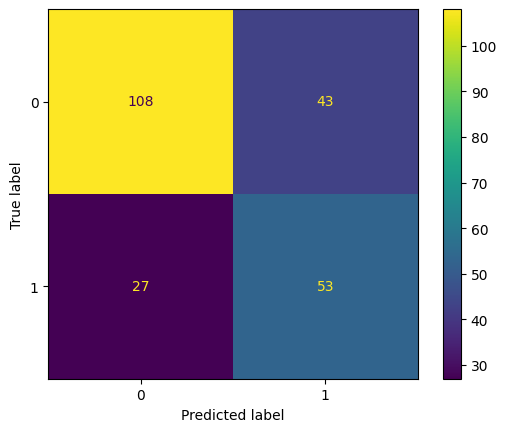

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()


#**Phase 6: Prediction**

In [ ]:
# Format: [Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
sample1 = [[1, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21]]  # Example 1 Not Diabetic  [[1, 85, 66, 29, 0, 26.6, 0.351, 31]]
sample2 = [[5, 150, 85, 30, 200, 35.0, 0.7, 45]]   # Example 2 Diabetic  [[6, 148, 72, 35, 150, 33.6, 0.627, 50]]

sample_scaled1=scaler.transform(sample1)
sample_scaled2=scaler.transform(sample2)
# Predict for sample1
prediction1 = knn.predict(sample_scaled1)
print("Prediction for sample1:", "Diabetic" if prediction1[0] == 1 else "Not Diabetic")

# Predict for sample2
prediction2 = knn.predict(sample_scaled2)
print("Prediction for sample2:", "Diabetic" if prediction2[0] == 1 else "Not Diabetic")


Prediction for sample1: Not Diabetic
Prediction for sample2: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
